# Block 1

In [1]:
# imported the libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Block 2

In [6]:
def titanic_survival(X,y,fig):
  """
  purpose of function: find out which is variable the best predictor of survival (Pclass or Fare) and show a figure w/ a boxplot and ROC curve if requested

  inputs:
  X = predictor values (Pclass or Fare)
  y = target values (survival)
  fig = indicates whether a figure is shown ('figure' or 'no figure')
  """
  # transforms X and y data into arrays
  X = np.array(X)
  y = np.array(y)

  # splits data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X.reshape(len(X),1), y, random_state=1)

  # creates a decision tree
  decision_tree_model = tree.DecisionTreeClassifier(max_depth=3)
  # fits the model 
  decision_tree_model = decision_tree_model.fit(X_train, y_train)

  # accuracy of predicted survival from the:
  training_accuracy = decision_tree_model.score(X_train, y_train) # training set
  testing_accuracy = decision_tree_model.score(X_test, y_test) # testing set 

  # if the difference btw the testing and training scores is greater than 0.1:
  training_test_diff = round(training_accuracy - testing_accuracy,3)
  if training_test_diff > 0.1:
    # the model is overfitting
    print('difference btw training and testing data: ' + str(training_test_diff) + ' --> the model is overfitting')
  else:
    # otherwise it is not overfitting
    print('difference btw training and testing data: ', str(training_test_diff), ' --> the model is NOT overfitting')

  # predictions for testing set values
  y_predicted = decision_tree_model.predict(X_test)
  
  # create subplot (2,1) that shows a boxplot of (y, X) one the top subplot and a ROC curve on the bottom subplot
  if fig == 'figure':
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=[7,12])

    # add box plot in the top subplot
    sns.boxplot(x=y, y=X, ax=axes[0])
    axes[0].set(title='Boxplot', xlabel='Survived')

    # if the max of the array is 3, we're looking at pclass
    if X.max() == 3:
      axes[0].set_ylabel('Pclass')
    # otherwise, we're looking at fare
    else:
      axes[0].set_ylabel('Fare')

    # add ROC curve in the bottom subplot
    false_positives, true_positives, thresholds = metrics.roc_curve(y_test, y_predicted)
    axes[1].plot(false_positives, true_positives, marker='o') # ROC curve
    axes[1].plot([0,1],[0,1], marker='o') # origin line
    axes[1].set(title='ROC Curve', xlabel='false positive rate', ylabel='true positive rate') # set title, xlabel, and ylabel of the ROC curve plot

    return 'Testing Score: ' + str(testing_accuracy)

  else:
    return 'Testing Score: ' + str(testing_accuracy)


# Block 3

In [3]:
titanic_data = sns.load_dataset('titanic')

# Block 4 

----- no figure -----
difference btw training and testing data:  0.014  --> the model is NOT overfitting
Testing Score: 0.6681614349775785
----- figure -----
difference btw training and testing data:  0.014  --> the model is NOT overfitting
Testing Score: 0.6681614349775785


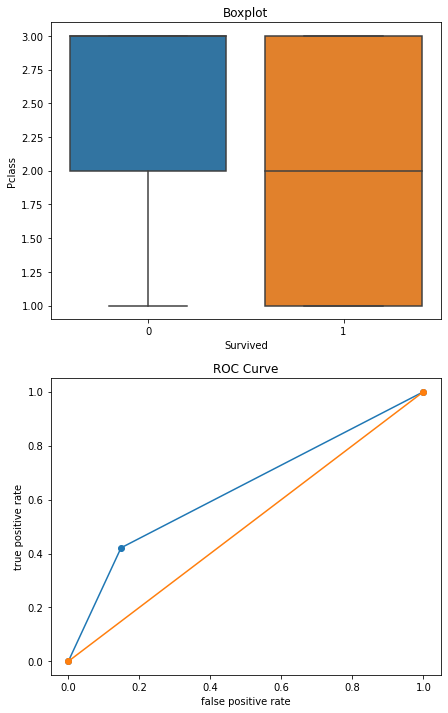

In [7]:
fig_list = ['no figure','figure']
for i in fig_list:
  print('-----',i,'-----')
  print(titanic_survival(titanic_data['pclass'],titanic_data['survived'],i,))

# Block 5

----- no figure -----
difference btw training and testing data:  0.079  --> the model is NOT overfitting
Testing Score: 0.6143497757847534
----- figure -----
difference btw training and testing data:  0.079  --> the model is NOT overfitting
Testing Score: 0.6143497757847534


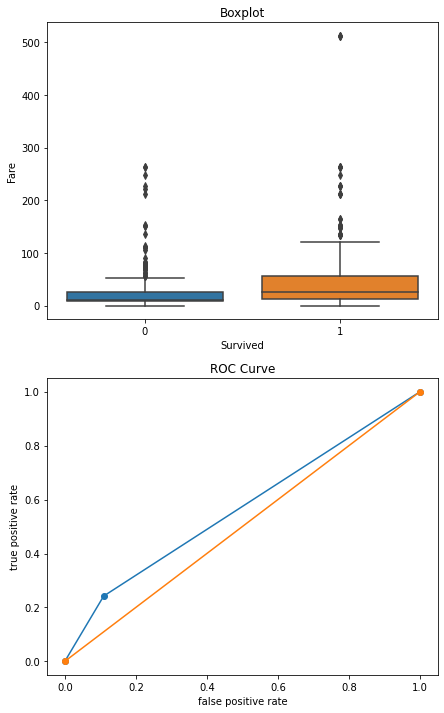

In [8]:
fig_list = ['no figure','figure']
for i in fig_list:
  print('-----',i,'-----')
  print(titanic_survival(titanic_data['fare'], titanic_data['survived'],i))

## Finding
#### Since Pclass has a higher testing score/accuracy (0.6682) than Fare (0.6143), Pclass is a better predictor of survival